#  Final Project – SCH-MGMT 661: Business Intelligence & Analytics  
**Spring 2025 – Group 6**  
**Instructor:** Indika Dissanayake  
**Project Title:** Airbnb Demand & Availability Forecasting – Amsterdam  

---

##  Group Members  
- Vineet Reddy Saddi  
- Prakash Sai Alla  
- Brinda Kaushik Bangalore Anantha Shesha  
- Disha Prasanna Kumar  


---

##  Project Overview

This project is part of the final assessment for SCH-MGMT 661 and involves analyzing publicly available Airbnb data to solve a real-world business problem using data analytics techniques.


This notebook includes:
-  Data acquisition and cleaning  
-  Exploratory data analysis (EDA)  
-  Feature engineering  
-  Visualizations across time and location  
-  Insights into booking trends  

The findings in this milestone will inform the development of a predictive model in the next phase.


##  Task 1: Pick a City and Define a Problem

### Selected City: Amsterdam 🇳🇱

Amsterdam is a globally renowned tourist destination with a vibrant short-term rental market. It has a large volume of Airbnb listings that vary in room type, location, and price. Due to its popularity and high visitor turnover, the availability and pricing of Airbnb listings fluctuate frequently, making it an ideal candidate for analysis.

---

###  Defined Business Problem: Demand & Availability Prediction

The primary business problem we aim to solve is **forecasting Airbnb demand and availability** in Amsterdam. By analyzing booking trends and listing features, we aim to predict whether a property will be booked on a given day.

This analysis can help:
- **Hosts** optimize pricing and availability to improve occupancy.
- **Travelers** identify high-demand periods and plan their trips accordingly.
- **Platform managers** monitor booking patterns across neighborhoods and time.

---

###  Why This Problem & City?

- Amsterdam has a **high density of listings**, offering rich and diverse data.
- The calendar data provides **daily booking availability**, ideal for time-series demand analysis.
- The city has **seasonal fluctuations in tourism**, which makes availability forecasting meaningful.
- We found the **calendar and listings datasets** for Amsterdam to be complete, well-documented, and suitable for the required exploratory and predictive work.

This problem is actionable, realistic, and aligned with real-world Airbnb stakeholder needs.

## Task 2: Data Acquisition and Cleaning

Load calendar and listings CSV files into DataFrames.

In [2]:
import numpy as np
import pandas as pd 


listing=pd.read_csv("C:\AI\Project Milestone\listings.csv")
calendar=pd.read_csv("C:\AI\Project Milestone\calendar.csv.gz")

We start by loading the dataset and previewing its columns and first few rows to understand the data structure.


In [3]:
listing.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,66.0,3,398,2025-01-03,2.05,1,10,31,0363 5F3A 5684 6750 D14D
1,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,NaN,3,294,2025-02-17,1.84,1,88,27,0363 974D 4986 7411 88D8
2,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75.0,2,677,2025-02-28,3.83,2,84,94,0363 607B EA74 0BD8 2F6F
3,29051,Comfortable single room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,794,2025-03-02,4.67,2,84,85,0363 607B EA74 0BD8 2F6F
4,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.37168,4.91471,Entire home/apt,NaN,3,42,2022-08-20,0.24,1,0,0,0363 E76E F06A C1DD 172C


In [4]:
listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10075 non-null  int64  
 1   name                            10075 non-null  object 
 2   host_id                         10075 non-null  int64  
 3   host_name                       10058 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10075 non-null  object 
 6   latitude                        10075 non-null  float64
 7   longitude                       10075 non-null  float64
 8   room_type                       10075 non-null  object 
 9   price                           5911 non-null   float64
 10  minimum_nights                  10075 non-null  int64  
 11  number_of_reviews               10075 non-null  int64  
 12  last_review                     

##  Clean the dataset


We notice that the neighbourhood_group has 0 non values so we explore it furthur


In [6]:
listing["neighbourhood_group"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10070   NaN
10071   NaN
10072   NaN
10073   NaN
10074   NaN
Name: neighbourhood_group, Length: 10075, dtype: float64

We drop the column as it only contains null values

In [7]:
listing=listing.drop(columns=["neighbourhood_group"])

We convert the price column into numeric

In [8]:
listing['price'] = listing['price'].replace('[\$,]', '', regex=True)
listing['price'] = pd.to_numeric(listing['price'], errors='coerce')

We now look at the calender dataset

In [9]:
calendar.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2025-03-03,f,$89.00,NaN,3.0,1125.0
1,2818,2025-03-04,t,$89.00,NaN,3.0,1125.0
2,2818,2025-03-05,t,$89.00,NaN,3.0,1125.0
3,2818,2025-03-06,t,$89.00,NaN,3.0,1125.0
4,2818,2025-03-07,t,$89.00,NaN,3.0,1125.0


In [10]:
calendar["price"]

0           $89.00
1           $89.00
2           $89.00
3           $89.00
4           $89.00
            ...   
3673986    $205.00
3673987    $205.00
3673988    $205.00
3673989    $205.00
3673990    $205.00
Name: price, Length: 3673991, dtype: object

We notice that the price column datatype is set to object and we verify if there any other columns with incorrect datatypes

In [11]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673991 entries, 0 to 3673990
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 196.2+ MB


We convert the price column into float 

In [12]:
calendar["price"] = calendar["price"].replace('[\$,]', '', regex=True).astype(float)

We also check if the adjusted_price column has alot of null values 

In [13]:
calendar['adjusted_price'].isna().sum(), calendar['adjusted_price'].notna().sum()


(np.int64(3673991), np.int64(0))

We drop the adjsuted_price column as it only cotains null values 

In [14]:
calendar=calendar.drop(columns=["adjusted_price"])


In [15]:
calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,2818,2025-03-03,f,89.0,3.0,1125.0
1,2818,2025-03-04,t,89.0,3.0,1125.0
2,2818,2025-03-05,t,89.0,3.0,1125.0
3,2818,2025-03-06,t,89.0,3.0,1125.0
4,2818,2025-03-07,t,89.0,3.0,1125.0


##   Extract Features
Extract day of the week and month from the 'date' column.

In [16]:
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')
calendar['day_of_week'] = calendar['date'].dt.day_name()
calendar['month'] = calendar['date'].dt.month


Transform the 'available' column into a binary 'is_booked' column.

In [17]:
calendar = calendar[calendar['available'].isin(['t', 'f'])]
calendar['is_booked'] = calendar['available'].apply(lambda x: 1 if x == 'f' else 0)

In [18]:
calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,day_of_week,month,is_booked
0,2818,2025-03-03,f,89.0,3.0,1125.0,Monday,3,1
1,2818,2025-03-04,t,89.0,3.0,1125.0,Tuesday,3,0
2,2818,2025-03-05,t,89.0,3.0,1125.0,Wednesday,3,0
3,2818,2025-03-06,t,89.0,3.0,1125.0,Thursday,3,0
4,2818,2025-03-07,t,89.0,3.0,1125.0,Friday,3,0


##  Merge DataFrames
Combine calendar and listings data on listing ID to enrich features.

In [19]:
calendar_sample = calendar.sample(n=100000, random_state=42)
merge = pd.merge(calendar_sample, listing, left_on="listing_id", right_on="id")

In [20]:
merge.columns

Index(['listing_id', 'date', 'available', 'price_x', 'minimum_nights_x',
       'maximum_nights', 'day_of_week', 'month', 'is_booked', 'id', 'name',
       'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price_y', 'minimum_nights_y', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

As there are 2 columns with price we rename as price_x to Calendar_price and price_y as Listing_price

In [21]:
merge = merge.rename(columns={"price_x": "calendar_price", "price_y": "listing_price"})

In [22]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   listing_id                      100000 non-null  int64         
 1   date                            100000 non-null  datetime64[ns]
 2   available                       100000 non-null  object        
 3   calendar_price                  100000 non-null  float64       
 4   minimum_nights_x                100000 non-null  float64       
 5   maximum_nights                  100000 non-null  float64       
 6   day_of_week                     100000 non-null  object        
 7   month                           100000 non-null  int32         
 8   is_booked                       100000 non-null  int64         
 9   id                              100000 non-null  int64         
 10  name                            100000 non-null  object  

In [23]:
merge.columns


Index(['listing_id', 'date', 'available', 'calendar_price', 'minimum_nights_x',
       'maximum_nights', 'day_of_week', 'month', 'is_booked', 'id', 'name',
       'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'listing_price', 'minimum_nights_y', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [24]:
df = merge[['latitude', 'longitude','is_booked', 'date', 'day_of_week', 'month', 'calendar_price', 'room_type',
         'number_of_reviews', 'reviews_per_month', 'availability_365']]

##  Encode Categorical Features
Convert 'room_type' and 'day_of_week' into dummy/indicator variables.

In [25]:
df = pd.get_dummies(df, columns=['day_of_week', 'room_type'], drop_first=True)

In [26]:
df = df.drop_duplicates()

## Task 3: Exploratory Data Analysis (EDA)

### Price Distribution
We Visualize the distribution of calendar_prices with a histogram 

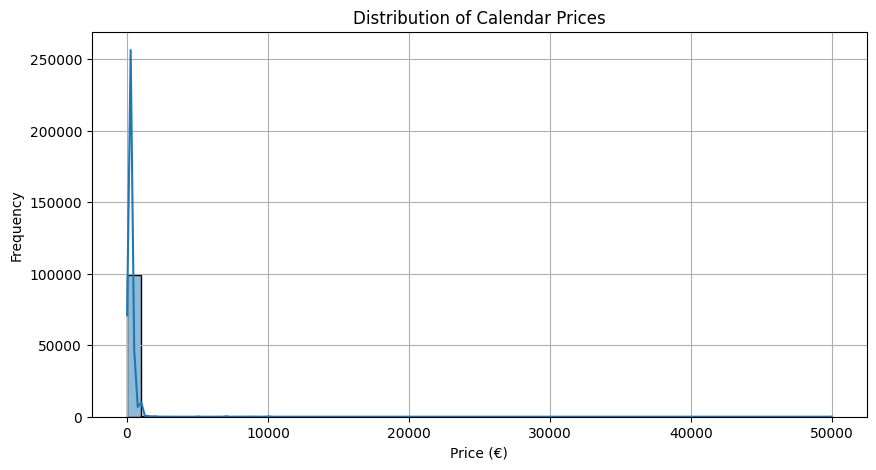

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['calendar_price'], bins=50, kde=True)
plt.title("Distribution of Calendar Prices")
plt.xlabel("Price (€)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


We notice that there are extreme outliers in the calendar_price column and its making the graph skewed. So we clip the data

In [28]:
q_low = df['calendar_price'].quantile(0.01)
q_high = df['calendar_price'].quantile(0.99)
df['calendar_price'] = df['calendar_price'].clip(lower=q_low, upper=q_high)

Now we plot the data again to see if its fixed

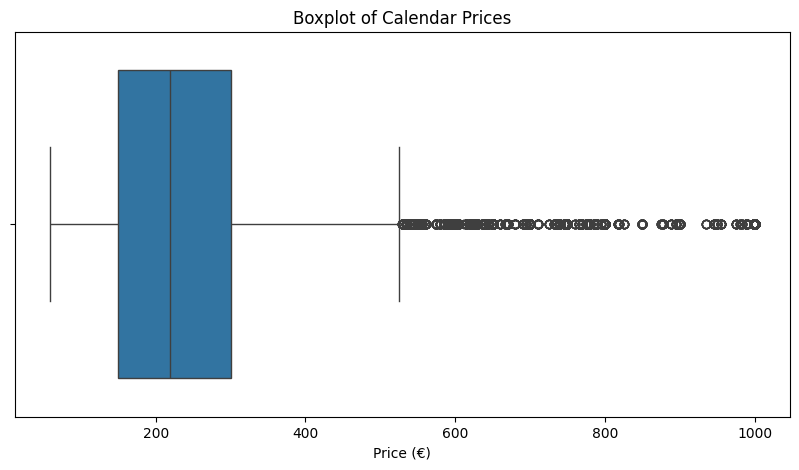

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['calendar_price'])
plt.title('Boxplot of Calendar Prices')
plt.xlabel('Price (€)')
plt.show()

###  Price vs. Number of Reviews
Scatter plot to explore price relationship with review count.

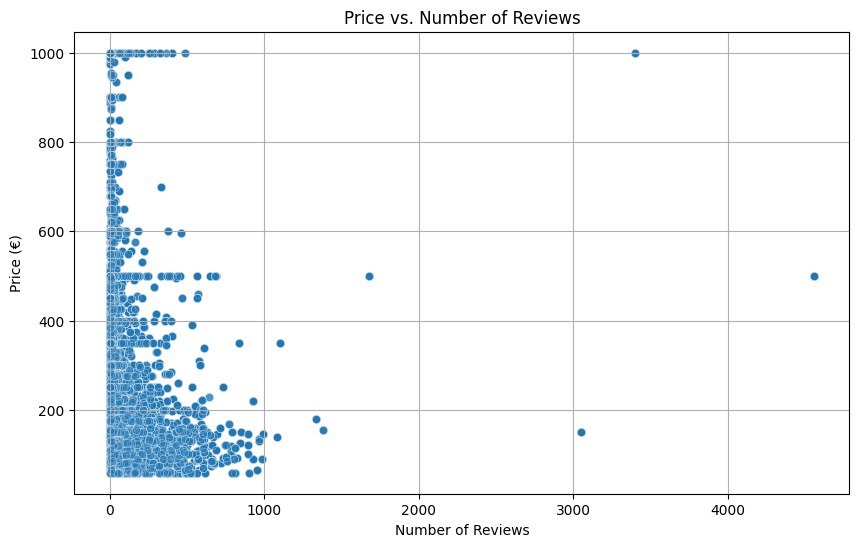

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='calendar_price', alpha=0.4)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price (€)")
plt.grid(True)
plt.show()

###  Correlation Matrix
WE examine how numerical features are correlated.

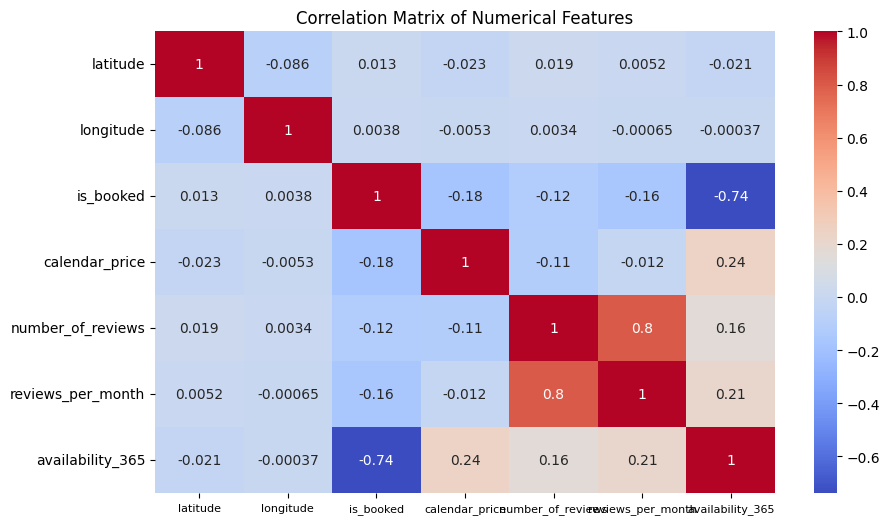

In [31]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
heatmap=sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 0, fontsize = 8)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

###  Booking Trend Over Time
Line plot showing average booking rates over time.

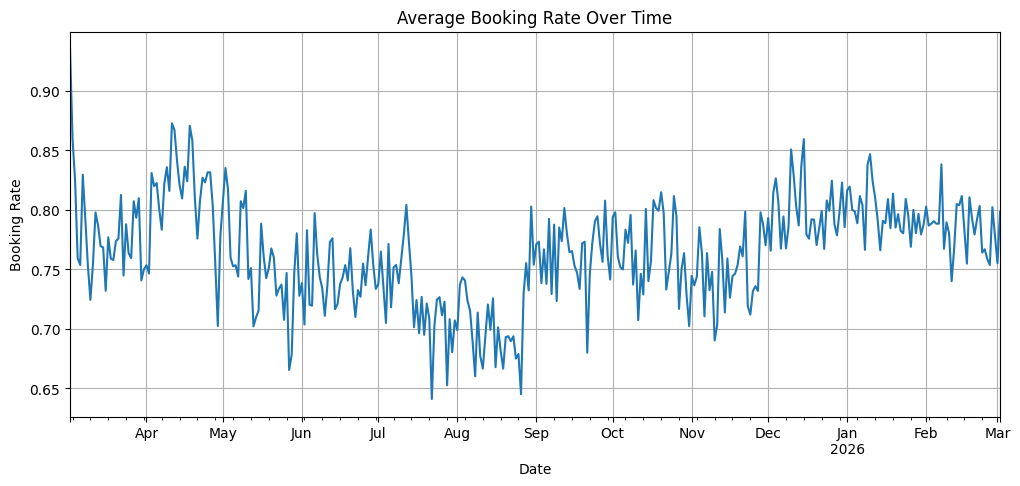

In [32]:
df['date'] = pd.to_datetime(df['date'])  # just in case
bookings_by_date = df.groupby('date')['is_booked'].mean()

plt.figure(figsize=(12, 5))
bookings_by_date.plot()
plt.title("Average Booking Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Booking Rate")
plt.grid(True)
plt.show()

###  Geospatial Distribution of Listings by Booking Status
This scatter plot visualizes the geographical distribution of Airbnb listings in Amsterdam based on their latitude and longitude. The points are color-coded by booking status—highlighting areas with higher or lower booking activity.

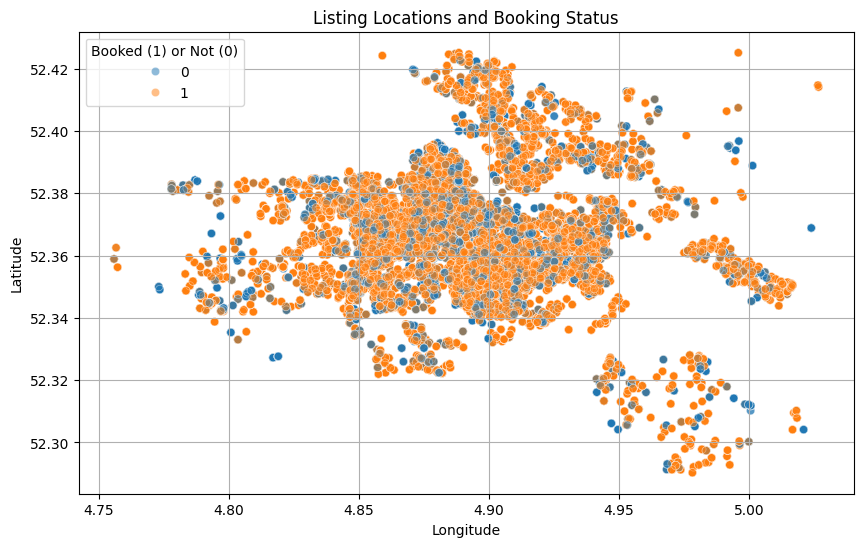

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='is_booked', alpha=0.5)
plt.title("Listing Locations and Booking Status")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Booked (1) or Not (0)')
plt.grid(True)
plt.show()

## Amsterdam Airbnb Bookings Overlayed on City Map
This visualization overlays Airbnb listings on a static map of Amsterdam, showing their geographic distribution along with booking status. Red dots indicate booked listings, while blue dots represent unbooked ones—providing spatial insights into popular areas and demand hotspots.

C:\Users\vinee\AppData\Local\Temp\ipykernel_20928\3564364783.py:42: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vinee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


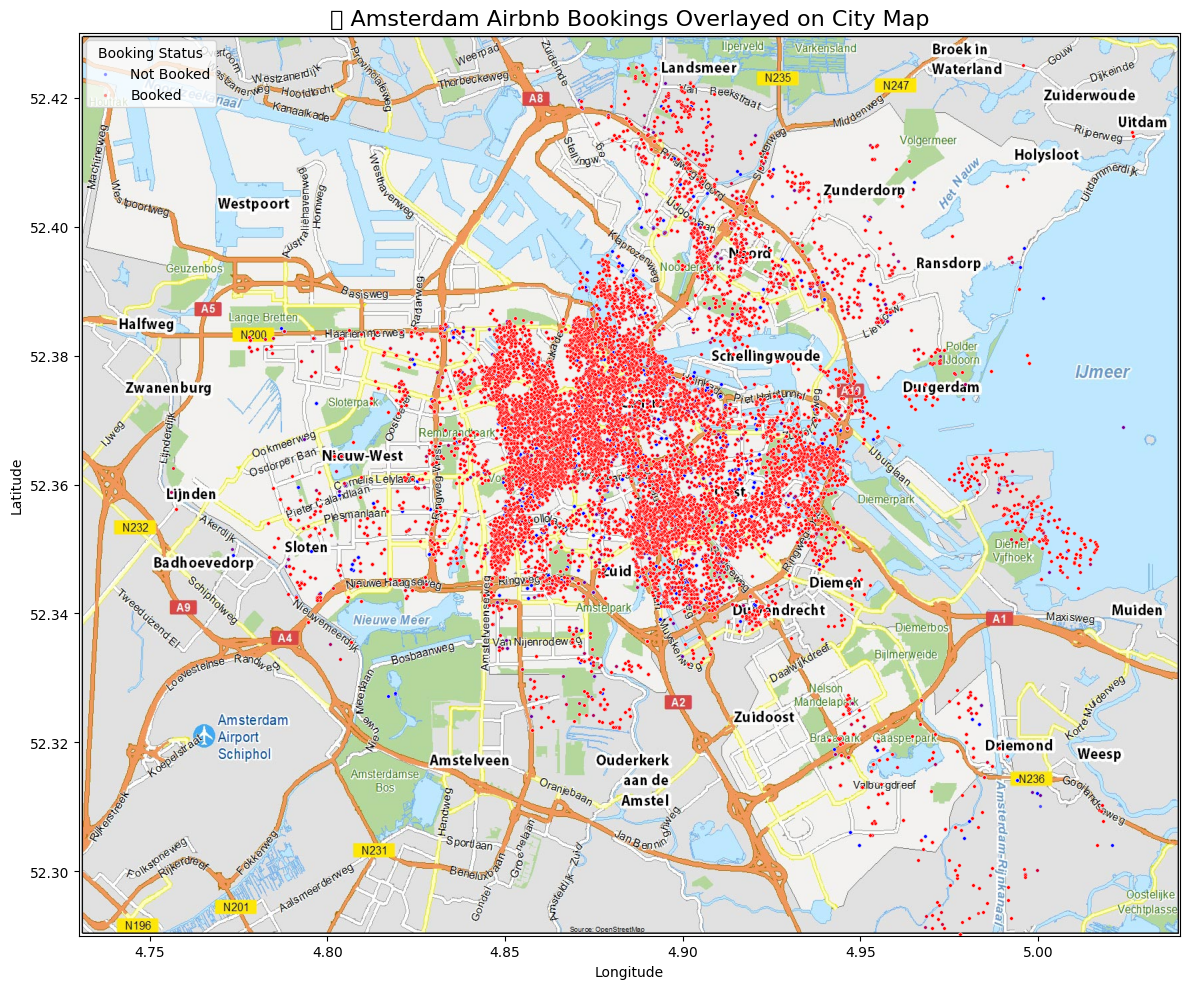

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the static Amsterdam map
img = mpimg.imread("C:\AI\Project Milestone\Amsterdam-Map-Netherlands.jpg")

# Option 1: Full Amsterdam extent
extent = [4.73, 5.04, 52.29, 52.43]

# Filter only listings within the extent (optional but cleaner)
filtered_df = df[
    (df['longitude'] >= extent[0]) & (df['longitude'] <= extent[1]) &
    (df['latitude'] >= extent[2]) & (df['latitude'] <= extent[3])
]

# Split the data
booked = filtered_df[filtered_df['is_booked'] == 1]
not_booked = filtered_df[filtered_df['is_booked'] == 0]

# Plotting
plt.figure(figsize=(12, 10))
plt.imshow(img, extent=extent, aspect='auto')

# Plot not booked first (blue)
plt.scatter(
    not_booked['longitude'], not_booked['latitude'],
    s=6, c='blue', alpha=0.4, label='Not Booked', edgecolors='white', linewidth=0.3
)

# Plot booked on top (red)
plt.scatter(
    booked['longitude'], booked['latitude'],
    s=6, c='red', alpha=0.4, label='Booked', edgecolors='white', linewidth=0.3
)

# Aesthetics
plt.title("📍 Amsterdam Airbnb Bookings Overlayed on City Map", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Booking Status", loc="upper left", fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()


### 🔧 Model Preparation and Training

In this step, we prepare the data and train the classification models.

- **Feature/target split**:  
  We separate the feature matrix `X` (excluding `is_booked` and `date`) and the target variable `y` (`is_booked`).

- **Handling missing values**:  
  We replace any remaining `NaN` values in the features with zero to ensure compatibility with machine learning algorithms.

- **Feature scaling**:  
  We standardize the features using `StandardScaler`, which transforms the data to have zero mean and unit variance. This is especially important for models like Logistic Regression.

- **Train/test split**:  
  We split the data into training (70%) and testing (30%) sets using `train_test_split` to allow proper model evaluation on unseen data.

This setup ensures that our models can be trained on clean, properly scaled data and evaluated fairly.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split features and target
X = df.drop(columns=['is_booked', 'date'])
X = X.fillna(0)  # fill any leftover NaNs
y = df['is_booked']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Task 5:  Model Training: Random Forest and Logistic Regression

In this step, we train two machine learning models to predict whether a listing will be booked:

- **Random Forest Classifier (`rf`)**:  
  We initialize a Random Forest model with a fixed random state for reproducibility. It is then trained (`fit`) on the training data (`X_train`, `y_train`) and used to predict outcomes on the test set (`X_test`).

- **Logistic Regression (`lr`)**:  
  We initialize a Logistic Regression model with a maximum of 1000 iterations to ensure convergence. It is similarly trained and used to generate predictions on the test set.

Both models produce predicted labels (`rf_preds`, `lr_preds`), which will be evaluated in the next steps to compare their performance.


In [45]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

## Task 6: Model Evaluation

We define a function to compute accuracy, precision, recall, and F1-score, and use it to evaluate the Random Forest and Logistic Regression models.


In [46]:
# Evaluation function
def evaluate(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name}: Accuracy={acc:.3f}, Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")

# Evaluate models
evaluate(y_test, rf_preds, 'Random Forest')
evaluate(y_test, lr_preds, 'Logistic Regression')

Random Forest: Accuracy=0.908, Precision=0.932, Recall=0.949, F1=0.940
Logistic Regression: Accuracy=0.880, Precision=0.906, Recall=0.940, F1=0.923


##  Confusion Matrix for Random Forest

We compute and visualize the confusion matrix for the Random Forest model using a heatmap to show the counts of true positives, true negatives, false positives, and false negatives.


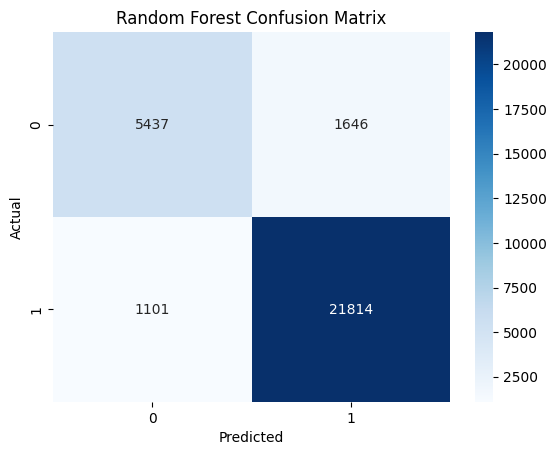

In [43]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

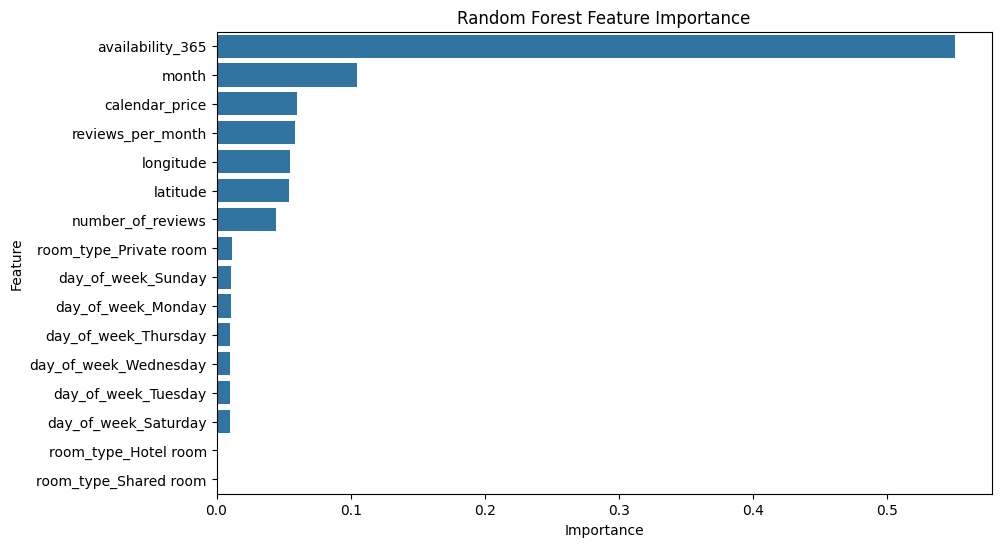

In [39]:
# Feature importance plot
importances = rf.feature_importances_
feature_names = df.drop(columns=['is_booked', 'date']).columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [47]:
from sklearn.metrics import classification_report

# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      7083
           1       0.93      0.95      0.94     22915

    accuracy                           0.91     29998
   macro avg       0.88      0.86      0.87     29998
weighted avg       0.91      0.91      0.91     29998

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      7083
           1       0.91      0.94      0.92     22915

    accuracy                           0.88     29998
   macro avg       0.84      0.81      0.83     29998
weighted avg       0.88      0.88      0.88     29998

